In [ ]:
pip install plotly pandas

# Data Understanding

In [24]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/bebekgarut/SOM-country-data/refs/heads/main/Country-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Data Preprocessing

Drop kolom exports dan imports karena tidak dibutuh untuk menghitung kesejahteraan rakyat

In [25]:
data.drop(columns=['exports', 'imports'],inplace=True, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   health      167 non-null    float64
 3   income      167 non-null    int64  
 4   inflation   167 non-null    float64
 5   life_expec  167 non-null    float64
 6   total_fer   167 non-null    float64
 7   gdpp        167 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 10.6+ KB


Cek outlier

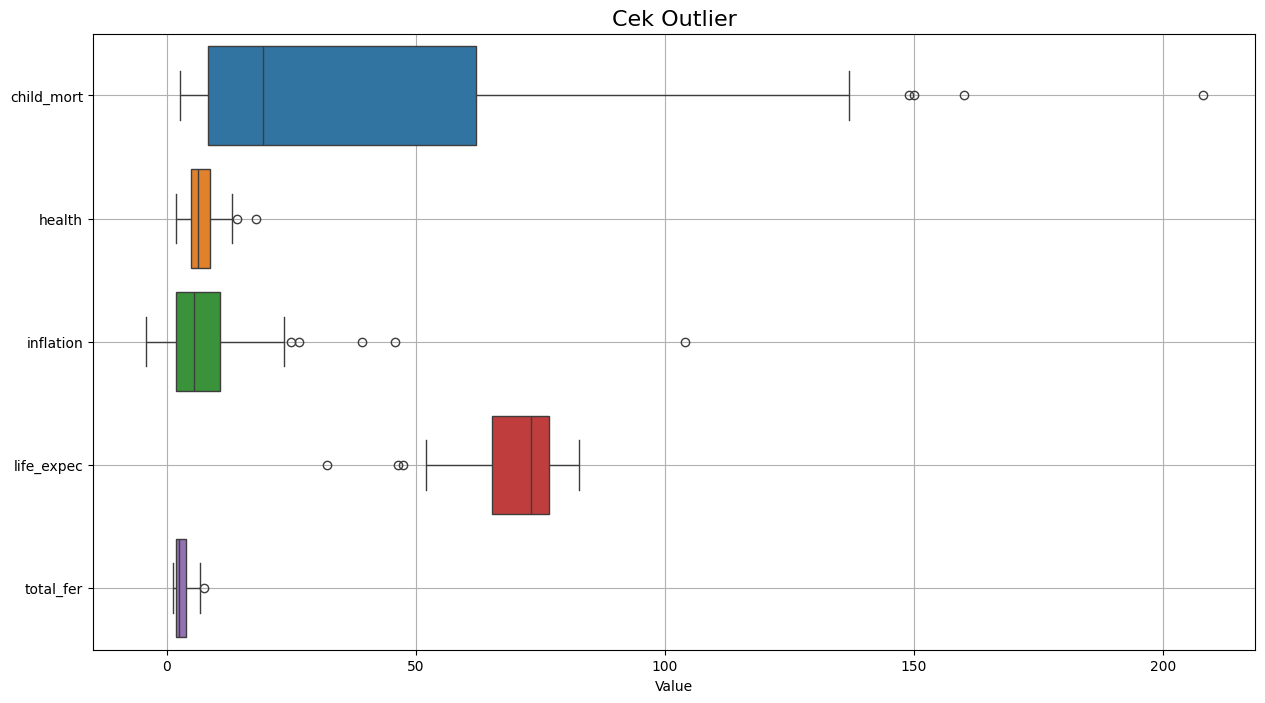

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['child_mort', 'health', 'inflation', 'life_expec', 'total_fer']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[columns], orient="h")
plt.title('Cek Outlier', fontsize=16)
plt.xlabel('Value')
plt.grid(True)
plt.show()

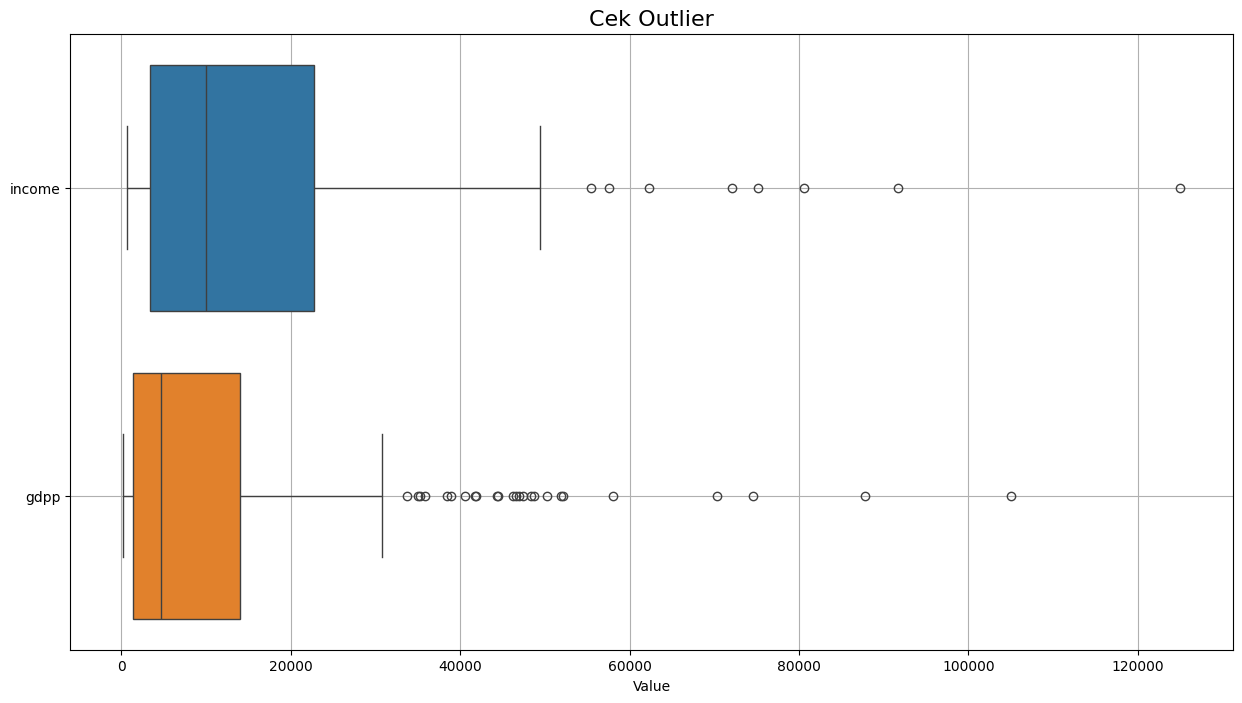

In [27]:
columns = ['income', 'gdpp']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[columns], orient="h")
plt.title('Cek Outlier', fontsize=16)
plt.xlabel('Value')
plt.grid(True)
plt.show()

Karena banyaknya outlier maka untuk normalisasi data menggunakan RobustScaler

Simpan kolom country lalu hapus untuk melakukan training

In [28]:
country_name = data['country']
data.drop(columns=['country'],inplace=True, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   health      167 non-null    float64
 2   income      167 non-null    int64  
 3   inflation   167 non-null    float64
 4   life_expec  167 non-null    float64
 5   total_fer   167 non-null    float64
 6   gdpp        167 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 9.3 KB


Normalisasi data dengan RobustScaler

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_array = scaler.fit_transform(data)

data = pd.DataFrame(scaled_array, columns=data.columns)

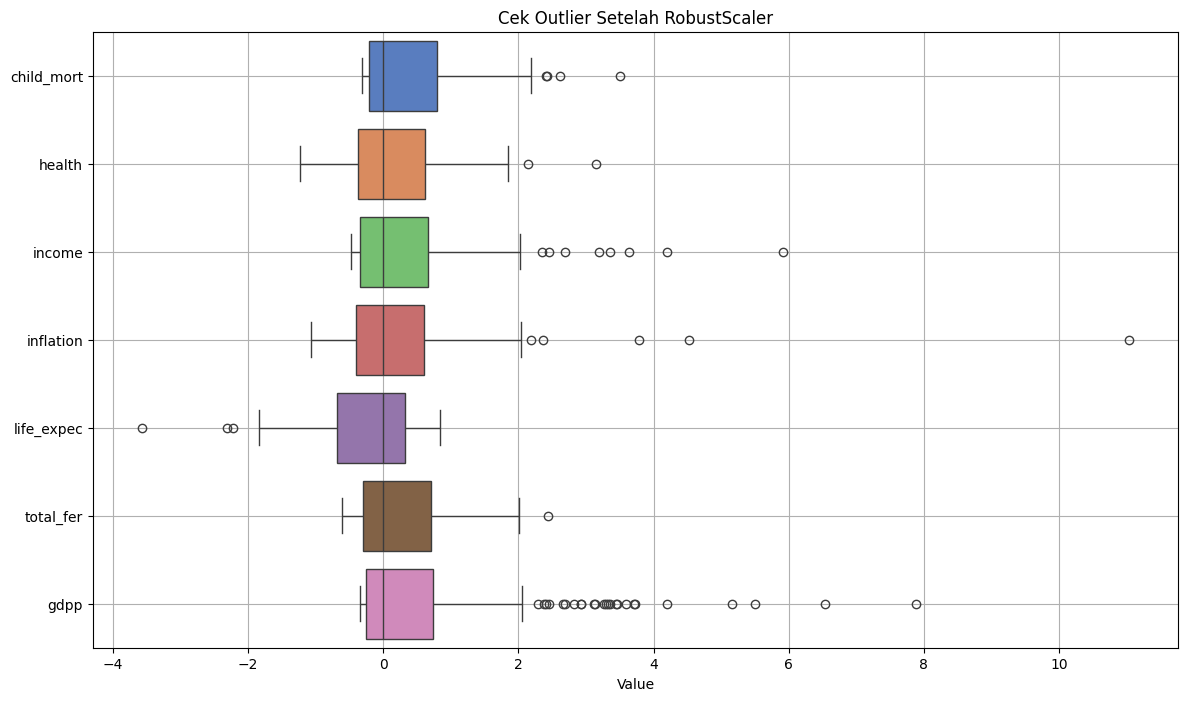

In [30]:
plt.figure(figsize=(14,8))
sns.boxplot(data=data, orient="h", palette="muted")
plt.title("Cek Outlier Setelah RobustScaler")
plt.xlabel("Value")
plt.grid(True)
plt.show()

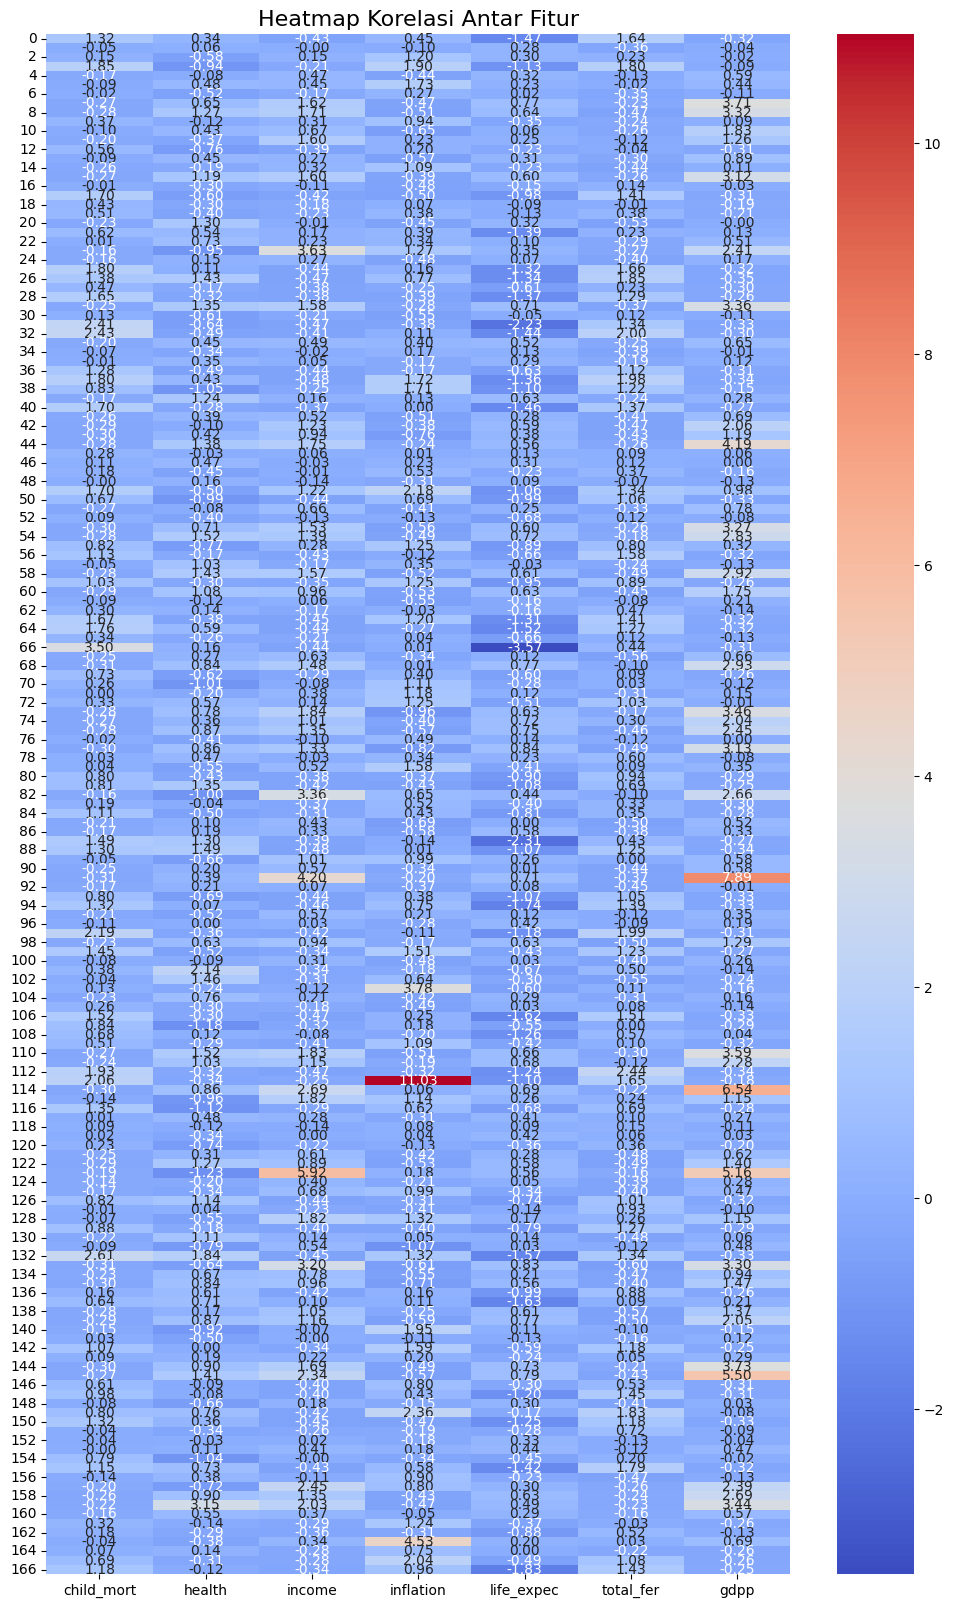

In [45]:
plt.figure(figsize=(12, 20))
sns.heatmap(data=data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()